In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import os 

In [5]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score 
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.layers import Flatten,Dense
from tensorflow.keras.applications import resnet50

In [8]:
image_size=32
batch_size=256

In [9]:
dataset=tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/waste-classification-data/DATASET/TRAIN/',shuffle=True,image_size=(image_size,image_size),batch_size=batch_size)
test_dataset=tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/waste-classification-data/DATASET/TEST/',shuffle=True,image_size=(image_size,image_size),batch_size=batch_size)

Found 22564 files belonging to 2 classes.
Found 2513 files belonging to 2 classes.


In [10]:
len(dataset)*0.80

71.2

In [11]:
dataset=dataset.shuffle(100000,seed=20)

In [12]:
train_ds=dataset.take(71)

In [13]:
len(train_ds)

71

In [14]:
val_ds=dataset.skip(71)

In [15]:
len(val_ds)

18

In [16]:
len(test_dataset)

10

In [17]:
#prefetch to read faster gpu trains and cpu fetches next batch
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset=test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
def train_model_feature_extraction(lr,epochs):
    pretrained_model= tf.keras.applications.resnet50.ResNet50(include_top=False,
                   input_shape=(image_size,image_size,3),
                   #pooling='avg',
                   weights='imagenet')
    print("Number of layers in the base model: ", len(pretrained_model.layers))

    pretrained_model.trainable = False
    pretrained_model.summary()
    VGG19_model_frozen = Sequential()
    pretrained_model.trainable = False
    #for layer in pretrained_model.layers[:11]:
        #layer.trainable = False


    #for layer in pretrained_model.layers[:-1]: # go through until last layer
        #resnet_model.add(layer)


    #resnet_model.add(tf.keras.layers.BatchNormalization(renorm=True))
    VGG19_model_frozen.add(pretrained_model)
    #resnet_model.add(tf.keras.layers.BatchNormalization())
    VGG19_model_frozen.add(Flatten())

    prediction_layer = tf.keras.layers.Dense(2, activation='softmax')
    VGG19_model_frozen.add(prediction_layer)

    #model.compile(optimizer='adam', loss='categorical_crossentropy')
    for i, layer in enumerate(pretrained_model.layers):
            print(i, layer.name, "-", layer.trainable)
            
    opt = Adam(learning_rate=lr)
    VGG19_model_frozen.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
    history=VGG19_model_frozen.fit(train_ds,epochs=epochs,batch_size=256,verbose=1,validation_data=val_ds)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,5.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()
    scores=VGG19_model_frozen.evaluate(test_dataset)
    print(scores)
    

94781440/94765736 [==============================] - 1s 0us/step
Number of layers in the base model:  175
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]   

2022-10-11 12:34:32.007037: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called..

70/71 [============================>.] - ETA: 0s - loss: 0.6362 - accuracy: 0.7719

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

71/71 [==============================] - 85s 215ms/step - loss: 0.6347 - accuracy: 0.7718 - val_loss: 0.4080 - val_accuracy: 0.8361
Epoch 2/20
71/71 [==============================] - 2s 29ms/step - loss: 0.4155 - accuracy: 0.8312 - val_loss: 0.3574 - val_accuracy: 0.8491
Epoch 3/20
71/71 [==============================] - 2s 30ms/step - loss: 0.3738 - accuracy: 0.8428 - val_loss: 0.3455 - val_accuracy: 0.8578
Epoch 4/20
71/71 [==============================] - 2s 29ms/step - loss: 0.3456 - accuracy: 0.8561 - val_loss: 0.3224 - val_accuracy: 0.8665
Epoch 5/20
71/71 [==============================] - 2s 29ms/step - loss: 0.3350 - accuracy: 0.8585 - val_loss: 0.3246 - val_accuracy: 0.8671
Epoch 6/20
71/71 [==============================] - 2s 29ms/step - loss: 0.3236 - accuracy: 0.8645 - val_loss: 0.3043 - val_accuracy: 0.8719
Epoch 7/20
71/71 [==============================] - 2s 29ms/step - loss: 0.3167 - accuracy: 0.8695 - val_loss: 0.3047 - val_accuracy: 0.8726
Epoch 8/20
71/71 [====

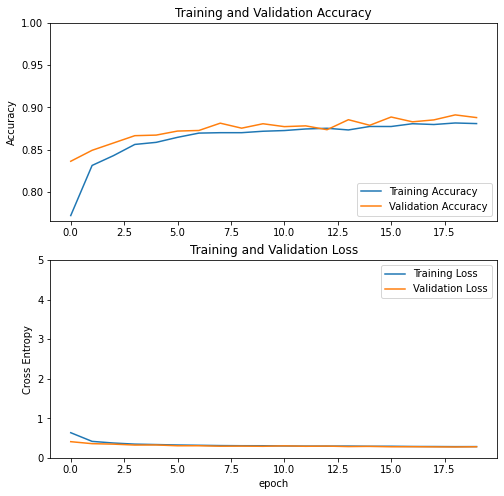

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 7s 53ms/step - loss: 0.3779 - accuracy: 0.8731
[0.377920925617218, 0.8730601072311401]


In [19]:
train_model_feature_extraction(0.001,20)

In [22]:
def train_model_fine_tuning(lr,epochs):
    pretrained_model= tf.keras.applications.resnet50.ResNet50(include_top=False,
                   input_shape=(image_size,image_size,3),
                   #pooling='avg',
                   weights='imagenet')
    print("Number of layers in the base model: ", len(pretrained_model.layers))

    
    pretrained_model.summary()
    VGG19_model_frozen = Sequential()
    pretrained_model.trainable = True
    for layer in pretrained_model.layers[:100]:
        layer.trainable = False


    #for layer in pretrained_model.layers[:-1]: # go through until last layer
        #resnet_model.add(layer)


    #resnet_model.add(tf.keras.layers.BatchNormalization(renorm=True))
    VGG19_model_frozen.add(pretrained_model)
    #resnet_model.add(tf.keras.layers.BatchNormalization())
    VGG19_model_frozen.add(Flatten())

    prediction_layer = tf.keras.layers.Dense(2, activation='softmax')
    VGG19_model_frozen.add(prediction_layer)

    #model.compile(optimizer='adam', loss='categorical_crossentropy')
    for i, layer in enumerate(pretrained_model.layers):
            print(i, layer.name, "-", layer.trainable)
            
    opt = Adam(learning_rate=lr)
    VGG19_model_frozen.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
    history=VGG19_model_frozen.fit(train_ds,epochs=epochs,batch_size=256,verbose=1,validation_data=val_ds)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,5.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()
    scores=VGG19_model_frozen.evaluate(test_dataset)
    print(scores)
    

Number of layers in the base model:  175
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
__________________________________________________

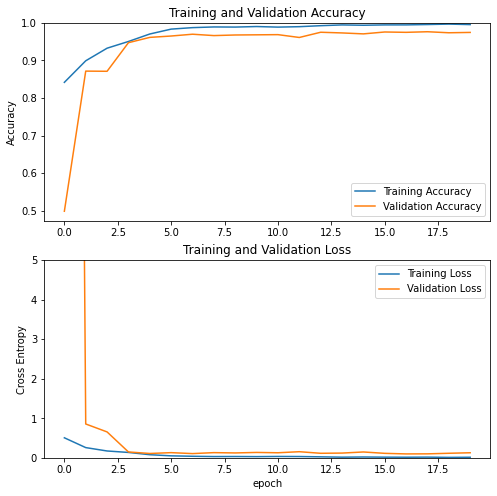

10/10 [==============================] - 0s 23ms/step - loss: 1.0410 - accuracy: 0.8778
[1.040976881980896, 0.8778352737426758]


In [23]:
train_model_fine_tuning(0.001,20)